In [121]:
library(repr)
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 80, repr.plot.quality = 30)
options(jupyter.plot_mimetypes = 'image/png')

setwd("~/yandexDisk/DIPLOMA/CODE/")
source("./src/simulations.functions.R", echo=FALSE)
debug.file <- ".various.Rdata/Iter.info"

[1] 61.03999

[1] 99.2369

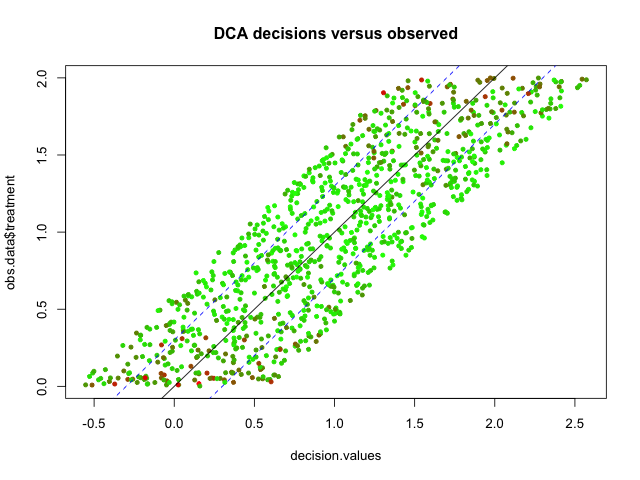

In [122]:
offset = 0.3
lambda = 0.02
dummy.params = c(1,2,3)
shrink=2

f  <- function(params, covars,  offset, treatment, shrink=1) {
    noise  <- runif(n = nrow(treatment), min =  -offset * shrink, max = offset * shrink )
    return (noise + treatment)
}

train = GetSimulationData(sample.size = 1000, number.of.covariates = 30)
train$raw.reward = train$reward

policy.f <- function(params, covars, h) {
    return(f(params, covars, offset=offset, treatment=train$treatment, shrink = shrink))
}

ValueFunction(params = dummy.params, obs.data = train, offset=offset, policy.function = policy.f)
ObjectiveFunction(params = dummy.params, obs.data = train, offset=offset, policy.function = policy.f, lambda = 0)
PlotDecsionsVersusObserved(obs.data=train, policy.f, offset=offset, opt.decision)

Correlation =  -1 


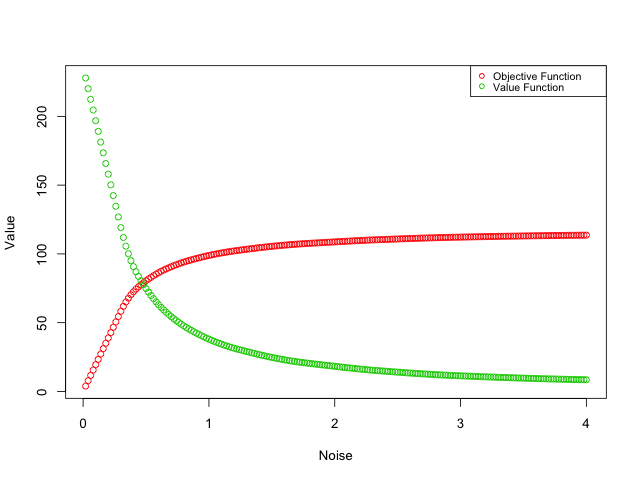

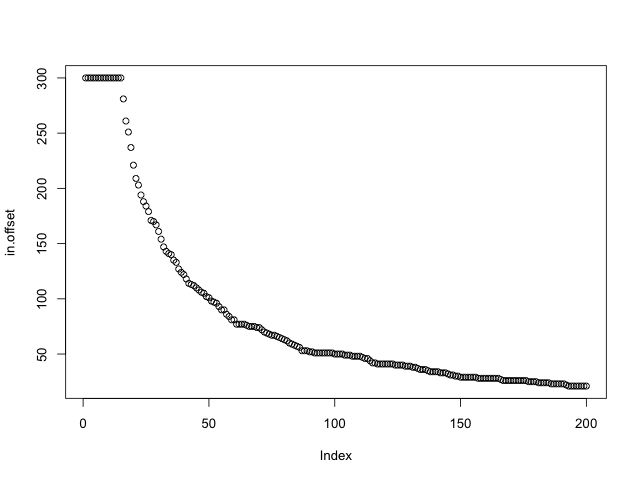

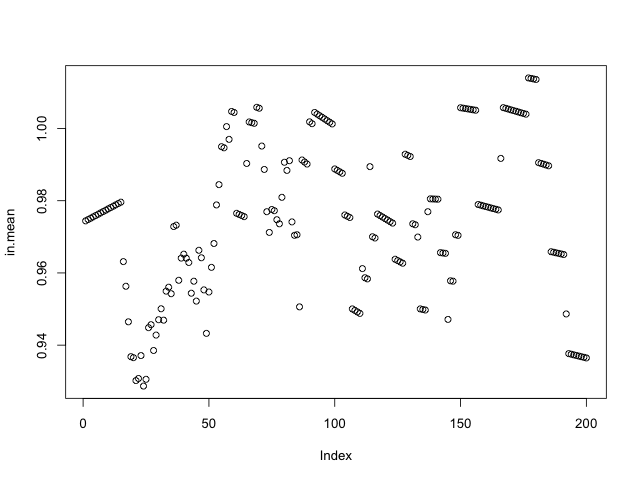

In [280]:
vf <- vector(mode="numeric")
objf <- vector(mode="numeric")
shrinks <- vector(mode="numeric")
shrink_max =  4
iters = 200
sample.size =  300 
noise  <- runif(n = sample.size, min =  -1, max = 1)

in.offset <- vector(mode="numeric")
in.mean <- vector(mode="numeric")

train = GetSimulationData(sample.size = sample.size, number.of.covariates = 30)
train$raw.reward = train$reward

for (i in seq(1, iters)) {
#     train$raw.reward = as.matrix(rep(1000, length.out = nrow(train$reward)))
#     train$raw.reward = as.matrix(runif(nrow(train$reward), min=1, max=1000 ))
    shrink = shrink_max * i / iters
    policy.f <- function(params, covars, h) {
        return (shrink * noise + train$treatment)
    }
    dtr.value.on.test.ideal <- ValueFunction(params = dummy.params, obs.data = train, 
                                             offset=offset, policy.function = policy.f)
    obj.func.ideal <- ObjectiveFunction(params = dummy.params, obs.data = train, 
                                        offset=offset, policy.function = policy.f, lambda = 0)
    
    in.index = (policy.f() < train$treatment + offset) &  (policy.f() > train$treatment - offset)
    in.offset <- c(in.offset, sum(in.index))
    in.mean <- c(in.mean, mean(policy.f()[in.index]))
    
    shrinks <- c(shrinks, shrink)
    vf <- c(vf, dtr.value.on.test.ideal)
    objf <- c(objf, obj.func.ideal)
#     if (! i %% 100 || i == 1 ) {
#        PlotDecsionsVersusObserved(obs.data=train, policy.f, offset=offset, opt.decision, 
#                                   title = paste("Noise = ", shrink)) 
#     }
}
cat("Correlation = ", cor(vf, objf), "\n")
plot(shrinks, objf, col=2, ylim=c(min(objf,vf), max(objf,vf)), xlab="Noise", ylab="Value")
points(shrinks, vf, col=3)
legend("topright", pch=c(1,1), col=c(2,3), c("Objective Function", "Value Function"),  cex=.8)
plot(in.offset)
plot(in.mean)

In [388]:

shrink_max =  4
iters = 200
sample.size =  300 
noise  <- runif(n = sample.size, min =  -1, max = 1)


global.in.mean <- list()
for (j in seq(1,200)) {
    train = GetSimulationData(sample.size = sample.size, number.of.covariates = 30)
    vf <- vector(mode="numeric")
    objf <- vector(mode="numeric")
    shrinks <- vector(mode="numeric")
    in.offset <- vector(mode="numeric")
    in.mean <- vector(mode="numeric")
    for (i in seq(1, iters)) {
        shrink = shrink_max * i / iters
        policy.f <- function(params, covars, h) {
            return (shrink * noise + train$treatment)
        }
        dtr.value.on.test.ideal <- ValueFunction(params = dummy.params, obs.data = train, 
                                                 offset=offset, policy.function = policy.f)
        obj.func.ideal <- ObjectiveFunction(params = dummy.params, obs.data = train, 
                                            offset=offset, policy.function = policy.f, lambda = 0)

        in.index = (policy.f() < train$treatment + offset) &  (policy.f() > train$treatment - offset)
        in.offset <- c(in.offset, sum(in.index))
        in.mean <- c(in.mean, mean(policy.f()[in.index]))

        shrinks <- c(shrinks, shrink)
        vf <- c(vf, dtr.value.on.test.ideal)
        objf <- c(objf, obj.func.ideal)
    }
    global.in.mean[[length(global.in.mean)+1]] <- in.mean
}

# cat("Correlation = ", cor(vf, objf), "\n")
# plot(shrinks, objf, col=2, ylim=c(min(objf,vf), max(objf,vf)), xlab="Noise", ylab="Value")
# points(shrinks, vf, col=3)
# legend("topright", pch=c(1,1), col=c(2,3), c("Objective Function", "Value Function"),  cex=.8)
# plot(in.offset)
# plot(in.mean)

# Проблема:

Correlation =  -0.9909327 


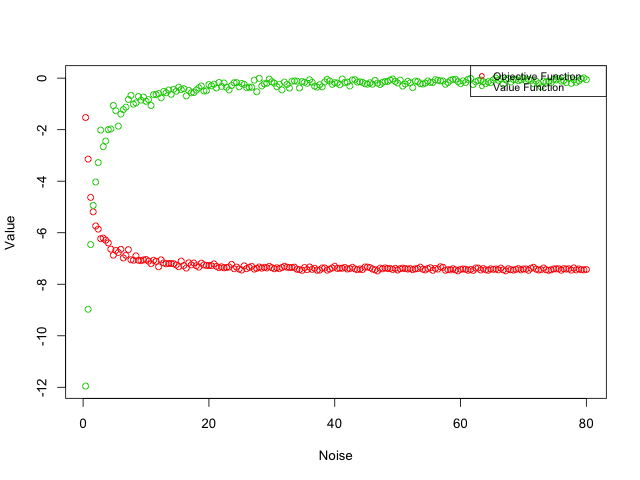

[1] -4.482835

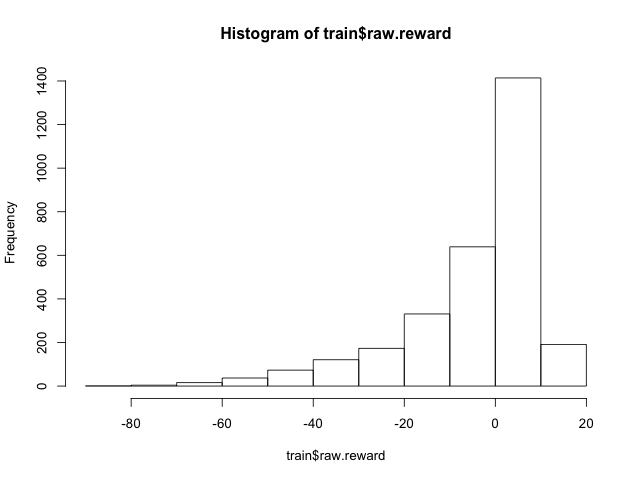

In [392]:
vf <- vector(mode="numeric")
objf <- vector(mode="numeric")
shrinks <- vector(mode="numeric")
shrink_max =  80
iters = 200

train = GetSimulationData(sample.size = 3000, number.of.covariates = 30)

for (i in seq(1, iters)) {

#     train$raw.reward = train$reward
    shrink = shrink_max * i / iters
    policy.f <- function(params, covars, h) {
        noise  <- runif(n = nrow(train$treatment), min =  -offset * shrink, max = offset * shrink )
        return (noise + train$treatment)
    }
    dtr.value.on.test.ideal <- ValueFunction(params = dummy.params, obs.data = train, offset=offset, policy.function = policy.f)
    obj.func.ideal <- ObjectiveFunction(params = dummy.params, obs.data = train, offset=offset, policy.function = policy.f, lambda = 0)
    shrinks <- c(shrinks, shrink)
    vf <- c(vf, dtr.value.on.test.ideal)
    objf <- c(objf, obj.func.ideal)
#     if (! i %% 100 || i == 1 ) {
#        PlotDecsionsVersusObserved(obs.data=train, policy.f, offset=offset, opt.decision, 
#                                   title = paste("Noise = ", shrink)) 
#     }
}
cat("Correlation = ", cor(vf, objf), "\n")
plot(shrinks, objf, col=2, ylim=c(min(objf,vf), max(objf,vf)), xlab="Noise", ylab="Value")
points(shrinks, vf, col=3)
legend("topright", pch=c(1,1), col=c(2,3), c("Objective Function", "Value Function"),  cex=.8)
hist(train$raw.reward)
mean(train$raw.reward)

# То, что делали мы

Correlation =  0.04023479 


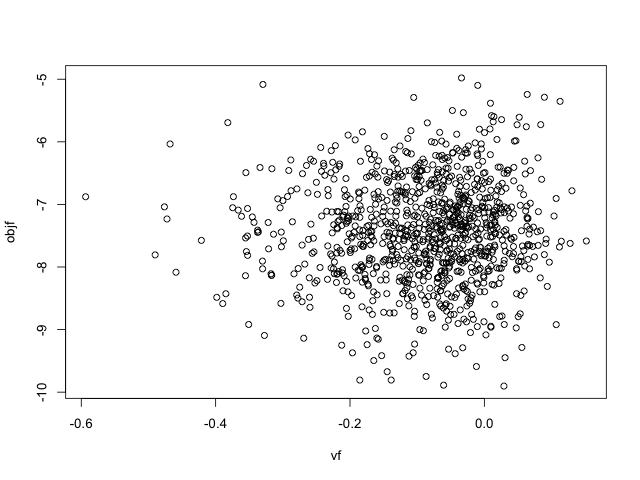

In [271]:
opt.decision <- c(1, 0.5, 0.5 , rep(0, length(dummy.params) - 3))



vf <- vector(mode="numeric")
objf <- vector(mode="numeric")

for (i in seq(1, 1000)) {
    test <- GetSimulationData(1000, 30)
#     test$raw.reward = test$reward
    params <- runif(ncol(test$covariates), min=-10, max=10)  
    dtr.value.on.test.ideal <- ValueFunction(params, test, offset, PolicyFunLinearKernel)
    obj.func.ideal <- ObjectiveFunction(params = params, obs.data = test, 
                                        offset = offset, policy.function = PolicyFunLinearKernel, lambda=0)
    vf <- c(vf, dtr.value.on.test.ideal)
    objf <- c(objf, obj.func.ideal)
    
}
cat("Correlation = ", cor(vf, objf), "\n")
plot(vf, objf)

Correlation =  -1 


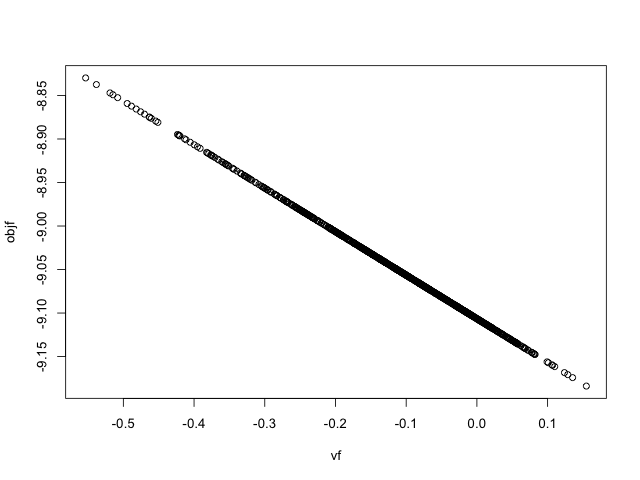

In [268]:
opt.decision <- c(1, 0.5, 0.5 , rep(0, length(dummy.params) - 3))

vf <- vector(mode="numeric")
objf <- vector(mode="numeric")

test <- GetSimulationData(1000, 30)
# test$raw.reward = test$reward

for (i in seq(1, 1000)) {
    
    params <- runif(ncol(test$covariates), min=-10, max=10)  
    dtr.value.on.test.ideal <- ValueFunction(params, test, offset, PolicyFunLinearKernel)
    obj.func.ideal <- ObjectiveFunction(params = params, obs.data = test, 
                                        offset = offset, policy.function = PolicyFunLinearKernel, lambda=0)
    vf <- c(vf, dtr.value.on.test.ideal)
    objf <- c(objf, obj.func.ideal)
    
}
cat("Correlation = ", cor(vf, objf), "\n")
plot(vf, objf)